# TP 1 Reinforcment Learning

Remarques :

. Deux parties : dans la première on suppose qu'on connait le MDP et dans la deuxième on se base sur des données et on ne connaît pas le MPD.

. Suitable structures : pour $p(y,a,x)$ qu'il va falloir store , on peut $p_{1}(y,x)$ et $p_{2}(y,x)$

. Faire tout en vectoriel matrix form

. Faire un truc simple pour modéliser le growth du tree

. Lorsque le tree est malade et qu'on le coupe on prend un reward négatif car il ne va rien rapporter en bois

.tree_sim une étape et tree_MDP c'est le truc entier. 

### Modelisation

* L'arbre est modélisé par un entier entre 0 et H. (au début à zéro) c'est le state space.

* Action space : 0 ou 1 (cut ou pas cut)

* Reward :
    - Maintenance : reward -10
    - Unit of wood : reward 10
    - Cost of planting : reward -5
    
* Discount factor : $\gamma=\frac{1}{1+r}$ avec $r=0.05$



### Growth of tree

A chaque itération on a une proba 3/4 que l'arbre grandisse d'une unité.

Ensuite il peut tomber malade avec un probabilité 1/16.

Grandir de deux unités avec une proba de 1/16. 

Ne pas grandir avec une probabilité 1/8.

Si l'arbre est malade il ne peut pas grandir.

### Variables

a c'est l'action integer

r reward integer

state x just the tree de 0 à H.

In [1]:
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [358]:
class Tree:
    
    def __init__(self,initSize,H,valueUnitOfWood=10,costOfPlanting=-5,costOfMaintenance=-10):
        self.size=initSize
        self.initSize=initSize
        self.state='healthy'
        self.Hmax=H
        self.valueUnitOfWood=valueUnitOfWood
        self.costOfPlanting=costOfPlanting
        self.costOfMaintenance=costOfMaintenance
        
    def tree_sim(self,x,a,verbose=0):
        
        reward=0
            
        if a==0 : # on coupe pas l'arbre
            choose=random.random()

            # L'arbre tombe malade avec proba 1/16
            
            if choose<=(1/16) :
                if verbose==1 :
                    print('The tree is getting sick')
                self.state='sick'
                reward=self.costOfMaintenance
              
            # L'arbre grandit de 2 avec proba 1/16
            
            if choose>1/16 and choose<=(2/16) and self.state=='healthy':
                if verbose==1 :
                    print('The tree grows of two units')
                
                if x<self.Hmax:
                    x=x+2
                
                reward=self.costOfMaintenance
             
            # L'arbre ne grandit pas avec proba 1/8
            
            if choose>(2/16) and choose<=(4/16):
                if verbose==1 :
                    print('The tree does not grow')
                    
                reward=self.costOfMaintenance

            # L'arbre grandit d'une unité avec proba 3/4
            
            if choose>(4/16) and choose<=1 and self.state=='healthy':
                if verbose==1 :
                    print('The tree grows of one unit')
                
                if x<self.Hmax:
                    x=x+1
                
                reward=self.costOfMaintenance

        if a==1 : # on coupe l'arbre et on en plante un autre de hauteur 1
            
            # on gagne la taille*la valeur de chaque bout de bois - le coût de la plantation
            reward=x*self.valueUnitOfWood-self.costOfPlanting 
            x=1
            self.state='healthy'
            
        
        return reward,x
        
    def tree_MDP(self,actions):
        
        rewards=[]
        treeSizes=[]
        treeHealth=[]
        
        if len(actions)==1:
            a=actions[0]
            treeSizes=self.tree_sim(self.size,a)[1]
            rewards=self.tree_sim(self.size,a)[0]
            self.size=treeSizes
            treeHealth=self.state
            
        if len(actions)>1:
            for a in actions:
                x=self.tree_sim(self.size,a)[1]
                r=self.tree_sim(self.size,a)[0]
                self.size=x
                treeSizes.append(x)
                rewards.append(r)
                treeHealth.append(self.state)
            
        return rewards,treeSizes,treeHealth
    
    def plot_MDP_health(self,rewards,treeSizes,treeHealth):
            
        use_colours = {"healthy": "blue", "sick": "red"}

        plt.figure(figsize=(20,10))

        plt.subplot(1,2,1)
        plt.scatter(range(len(rewards)),treeSizes,color=[use_colours[x] for x in treeHealth])
        plt.xlim([-1,len(rewards)])
        #plt.ylim([0,max(treeSizes)+1])
        plt.title('Simulation of a growing tree', fontsize=15)
        plt.ylabel('Tree\'s Height', fontsize=10)
        plt.xlabel('time', fontsize=10)
        #plt.yticks(range(max(treeSizes)))
        red_patch = mpatches.Patch(color='red', label='Sick')
        blue_patch = mpatches.Patch(color='blue', label='healthy')
        plt.legend(handles=[red_patch,blue_patch],loc=2)

        plt.subplot(1,2,2)
        plt.plot(rewards,'r-')
        plt.plot(np.cumsum(rewards),'b--',lw=2)
        plt.title('Rewards', fontsize=15)
        plt.ylabel('Value of rewards', fontsize=10)
        plt.xlabel('time', fontsize=10)
        #plt.yticks(range(min(np.cumsum(rewards)),max(rewards),3))
        plt.legend(['Reward at each time','Cumulative sum of rewards'])

        plt.show()
        

        
    def plot_MDP(self,rewards,treeSizes,cumul=True):
            

        plt.figure(figsize=(20,10))

        plt.subplot(1,2,1)
        plt.plot(treeSizes,color='darkgreen',lw=3)
        plt.xlim([-1,len(rewards)])
        #plt.ylim([0,max(treeSizes)+1])
        plt.title('Simulation of a growing tree', fontsize=15)
        plt.ylabel('Tree\'s Height', fontsize=10)
        plt.xlabel('time', fontsize=10)
        #plt.yticks(range(max(treeSizes)))
       
        plt.subplot(1,2,2)
        plt.plot(rewards,'r-')
        if cumul==True:
            plt.plot(np.cumsum(rewards),'b--',lw=2)
        plt.title('Rewards', fontsize=15)
        plt.ylabel('Value of rewards', fontsize=10)
        plt.xlabel('time', fontsize=10)
        #plt.yticks(range(min(np.cumsum(rewards)),max(rewards),3))
        plt.legend(['Reward at each time','Cumulative sum of rewards'])

        plt.show()
        
   
    

### Simulation MDP tree

In [337]:
t=Tree(initSize=0,H=100)
actions=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0]
rewards,treeSizes,treeHealth=t.tree_MDP(actions)

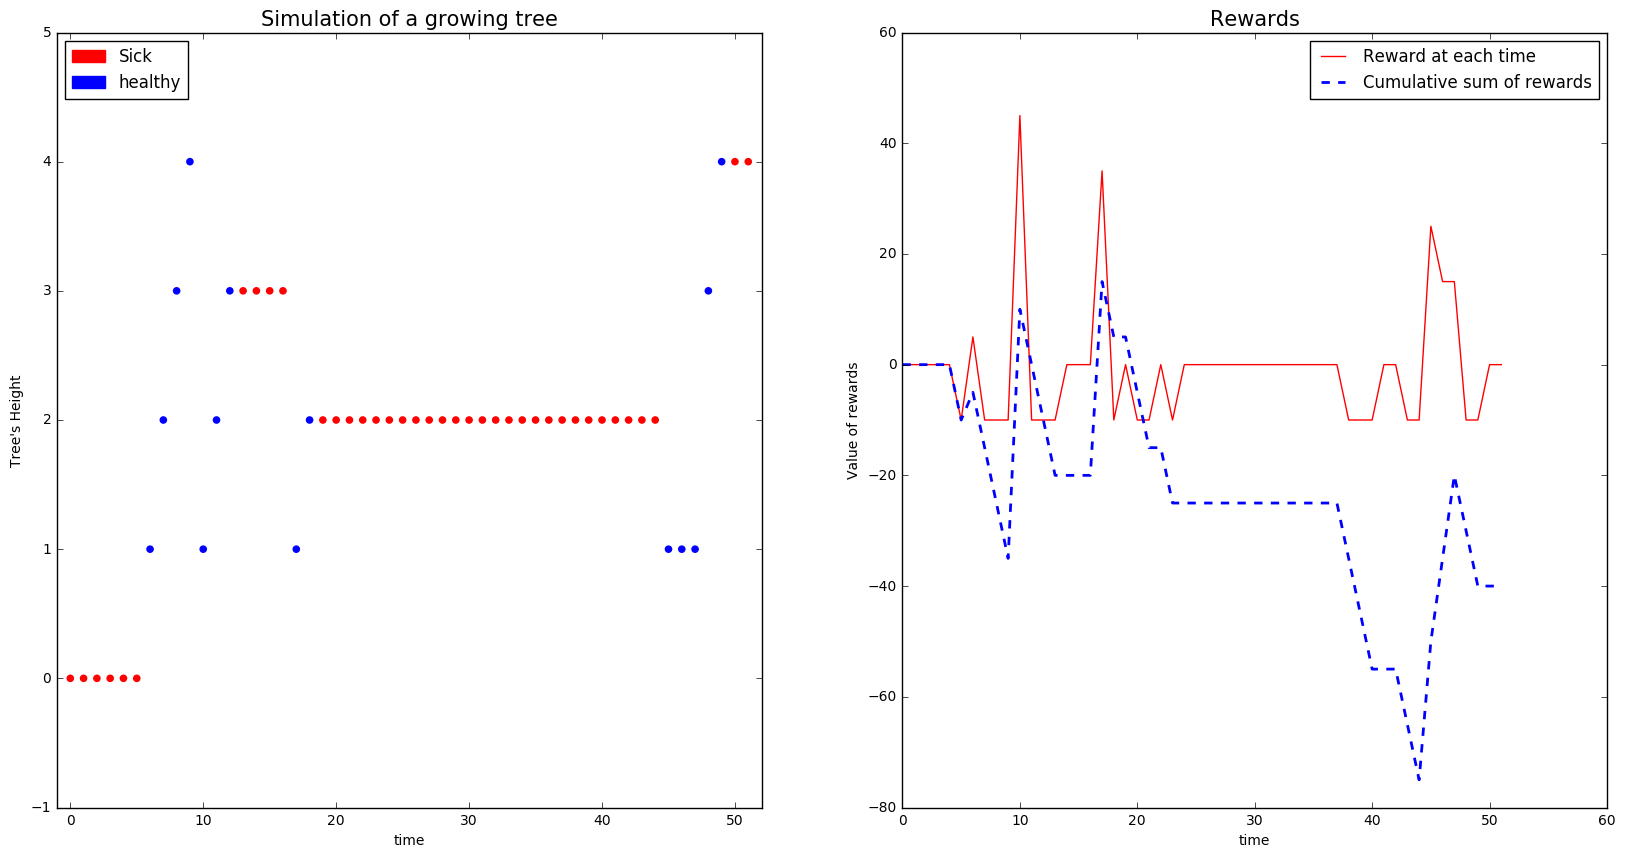

In [338]:
t.plot_MDP_health(rewards,treeSizes,treeHealth)

### Policy evaluation

In [339]:
class Agent :
    
    def __init__(self,rewardAmount):
        self.rewardAmount=rewardAmount
        
    def policy(self,nIter,nbRuns,Tree):
        raise NotImplementedError("Dumb ass ! Please implement this method")
        

On implémente d'abord un agent stupide qui ne coupe jamais son arbre

In [348]:
class StupidAgent(Agent):
    
    def __init__(self,rewardAmount=0):
        Agent.__init__(self,rewardAmount)
    
    def policy(self,nIter,nbRuns,tree):
        rewards=np.zeros((nIter,nbRuns))
        treeSizes=np.zeros((nIter,nbRuns))
        rewardAmounts=[]
        
        for run in range(nbRuns):
            t=Tree(initSize=tree.initSize
                ,costOfMaintenance=tree.costOfMaintenance
                ,costOfPlanting=tree.costOfPlanting
                ,H=tree.Hmax
                ,valueUnitOfWood=tree.valueUnitOfWood)
            actions=np.zeros(nIter)
            rewards[:,run],treeSizes[:,run],treeHealth=t.tree_MDP(actions)
            rewardAmounts.append(np.sum(rewards,axis=0))
        
        self.rewardAmount=np.mean(rewardAmounts)
        return np.mean(rewards,axis=1),np.mean(treeSizes,axis=1)
        
    def plot_policy(self,nIter,nbRuns,tree):
        rewards,treeSizes=self.policy(nIter,nbRuns,tree)
        tree.plot_MDP(rewards,treeSizes)

In [349]:
nIter=100
nbRuns=50
rewards=np.zeros((nIter,nbRuns))
treeSizes=np.zeros((nIter,nbRuns))
rewardAmounts=[]
tree=Tree(initSize=0,H=100)
for run in range(nbRuns):
    t=Tree(initSize=tree.initSize
           ,costOfMaintenance=tree.costOfMaintenance
           ,costOfPlanting=tree.costOfPlanting
          ,H=tree.Hmax
          ,valueUnitOfWood=tree.valueUnitOfWood)
    actions=np.zeros(nIter)
    rewards[:,run],treeSizes[:,run],treeHealth=t.tree_MDP(actions)
    rewardAmounts.append(np.sum(rewards,axis=0))

rewardAmount=np.mean(rewardAmounts)

rewardAmount=np.mean(rewardAmounts)
a=np.mean(rewards,axis=1)
b=np.mean(treeSizes,axis=1)
tree.initSize

0

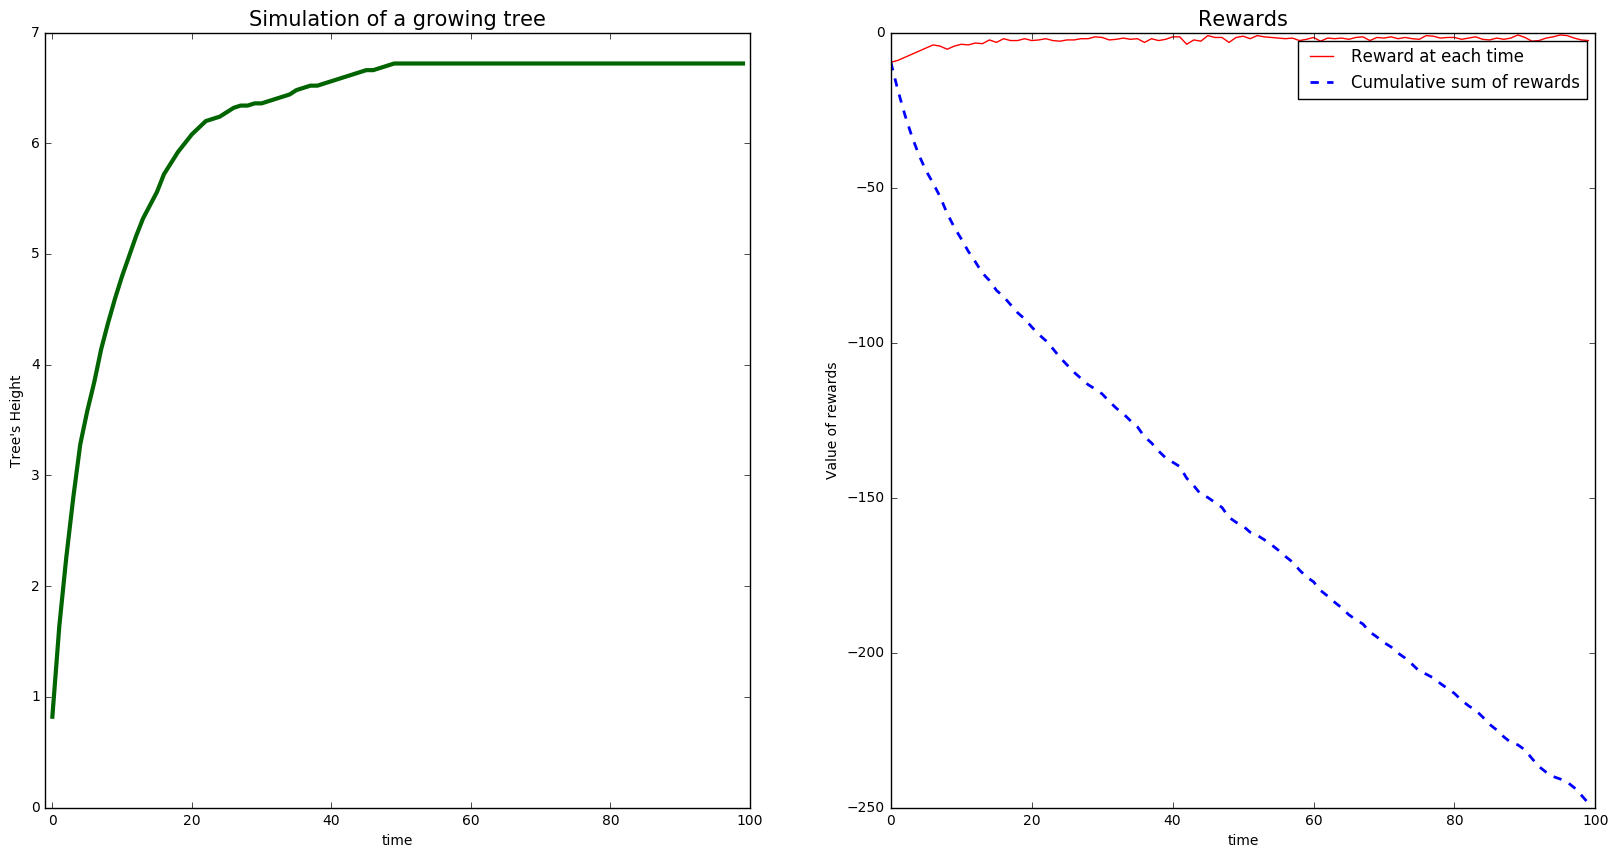

In [350]:
stdA=StupidAgent()
t=Tree(initSize=0,H=100)
stdA.plot_policy(100,50,t)

Forcément le mec perd du pognon, on va définir un autre agent qui coupe dès que l'arbre est malade.

In [383]:
class CuttingAgent(Agent):
    
    def __init__(self,rewardAmount=0):
        Agent.__init__(self,rewardAmount)
    
    def policy(self,nIter,nbRuns,tree):
        rewards=np.zeros((nIter,nbRuns))
        treeSizes=np.zeros((nIter,nbRuns))
        rewardAmounts=[]
        
        for run in range(nbRuns):
            t=Tree(initSize=tree.initSize
            ,costOfMaintenance=tree.costOfMaintenance
            ,costOfPlanting=tree.costOfPlanting
            ,H=tree.Hmax
            ,valueUnitOfWood=tree.valueUnitOfWood)
            
            for i in range(nIter):
                
                if t.state=='sick':
                    res=t.tree_MDP([1])
                    #print(res)
                    rewards[i,run]=res[0]
                    treeSizes[i,run]=res[1]

                else:
                    res=t.tree_MDP([0])
                    #print(res)
                    rewards[i,run]=res[0]
                    treeSizes[i,run]=res[1]
                    
            rewardAmounts.append(np.sum(rewards[:,run]))

        self.rewardAmount=np.mean(rewardAmounts)
        return np.mean(rewards,axis=1),np.mean(treeSizes,axis=1)
        
    def plot_policy(self,nIter,nbRuns,tree):
        rewards,treeSizes=self.policy(nIter,nbRuns,tree)
        tree.plot_MDP(rewards,treeSizes)

In [379]:
tree=Tree(initSize=0,H=100)
nbRuns=10
nIter=10
rewards=np.zeros((nIter,nbRuns))
treeSizes=np.zeros((nIter,nbRuns))
rewardAmounts=[]

for run in range(nbRuns):
    
    t=Tree(initSize=tree.initSize
        ,costOfMaintenance=tree.costOfMaintenance
        ,costOfPlanting=tree.costOfPlanting
        ,H=tree.Hmax
        ,valueUnitOfWood=tree.valueUnitOfWood)

    for i in range(nIter):

        if t.state=='sick':
            res=t.tree_MDP([1])
            #print(res[0])
            rewards[i,run]=res[0]
            print(rewards[i,run])
            treeSizes[i,run]=res[1]

        else :
            res=t.tree_MDP([0])
            #print(res)
            rewards[i,run]=res[0]
            treeSizes[i,run]=res[1]
            
        #print(rewards[:,run])


65.0
25.0
65.0
55.0
75.0
45.0


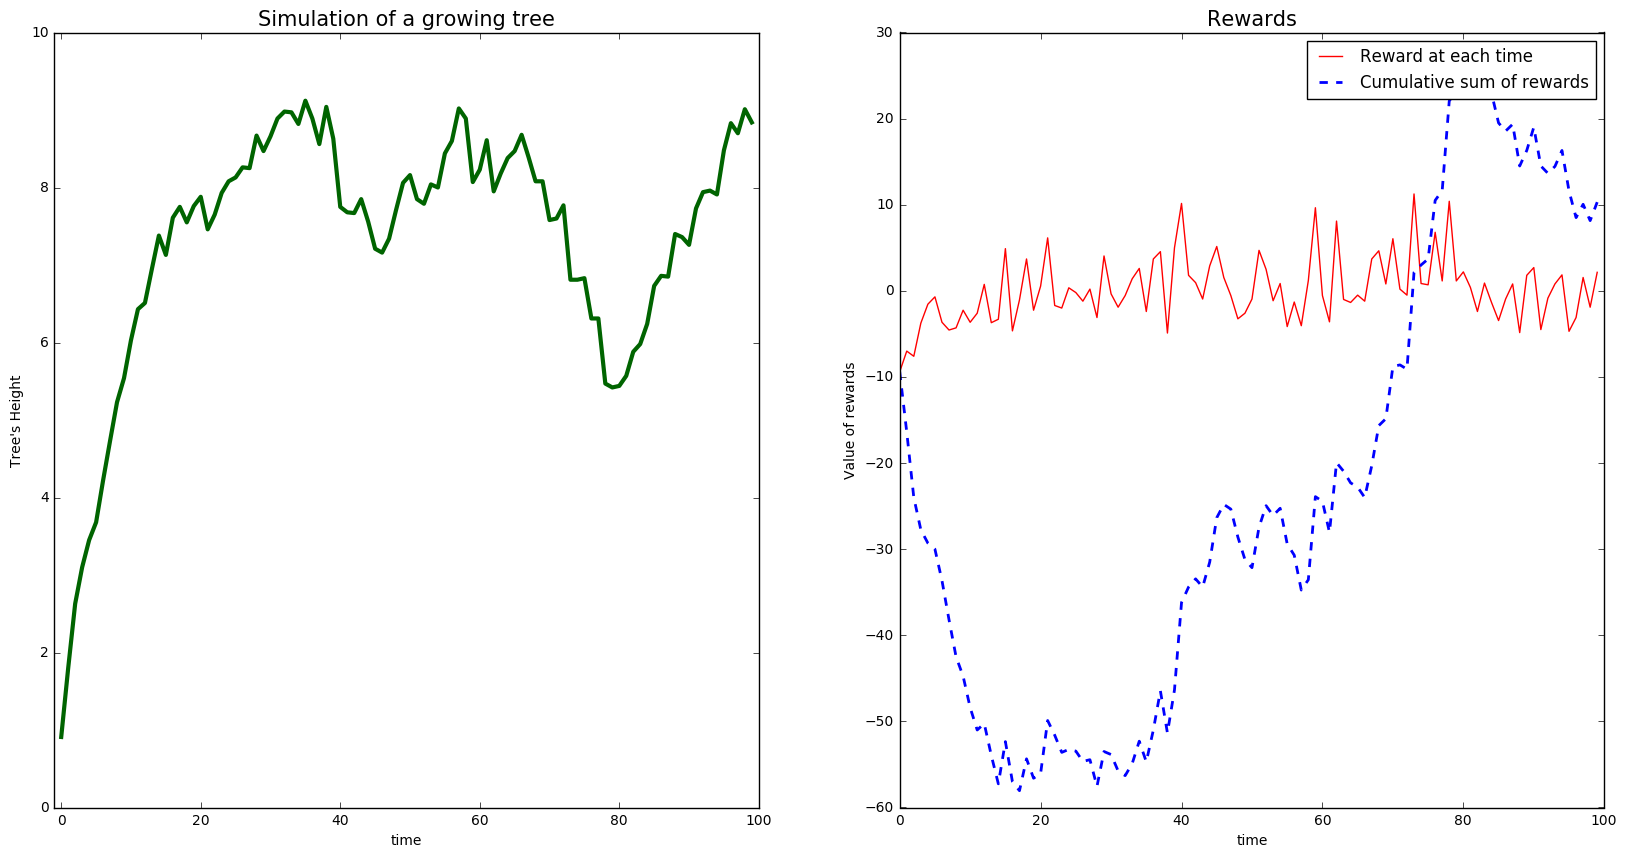

In [385]:
t=Tree(initSize=0,H=100)
cutA=CuttingAgent()
cutA.plot_policy(nIter=100,nbRuns=100,tree=t)

Ce n'est pas vraiment une policy sur le state... Là on a rajouté dans le state arbre malade ou pas du coup je sais pas trop.